In [252]:
from tqdm import tqdm
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
pd.set_option('display.max_columns', None)

In [253]:
df_anomaly = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._anomaly.csv',sep=';')
df_anomaly.replace('        -', np.nan, inplace=True)
df_anomaly.replace('-', np.nan, inplace=True)

df_anomaly

,Дата и время,"Полож.пед.акселер.,%","Нагрузка на двигатель, %","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,iButton2,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Уровень топлива % (spn96),Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийное давление масла КПП (spn3857),Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871),"Крутящий момент (spn513), Нм","Положение рейки ТНВД (spn51), %","Расход топлива (spn183), л/ч","ДВС. Температура наддувочного воздуха, °С","Давление наддувочного воздуха двигателя (spn106), кПа",Текущая передача (spn523),"Температура масла гидравлики (spn5536), С",Педаль слива (spn598)
0,19/05/2023 00:00:03,"7,0",NaN,488,59,"656,000",168:36,Отпущ.,NaN,-247,675,24,165,115,59,NaN,22,4047,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19/05/2023 00:00:33,"54,0",NaN,1171,77,"2424,000",168:36,Отпущ.,NaN,-9,1809,20,104,34,851,NaN,24,927,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19/05/2023 00:01:03,"6,0",NaN,721,168,"1151,000",168:36,Отпущ.,NaN,-127,2445,12,557,127,402,NaN,1,192,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19/05/2023 00:01:40,"91,0",NaN,779,75,"2324,000",168:36,Отпущ.,NaN,-178,2206,35,1126,13,822,NaN,12,1788,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19/05/2023 00:01:49,"59,0",NaN,718,181,"4658,000",NaN,NaN,NaN,-53,960,5,1248,16,622,NaN,10,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189699,18/05/2023 23:56:40,"8,0",NaN,458,6,"3350,000",168:36,Отпущ.,NaN,-238,2839,15,290,122,417,NaN,16,125,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189700,18/05/2023 23:57:10,"82,0",NaN,941,105,"2778,000",168:36,Отпущ.,NaN,-171,1895,20,1492,44,279,NaN,2,1350,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189701,18/05/2023 23:57:36,"10,0",NaN,1187,182,"2518,000",168:36,Отпущ.,NaN,-197,34,22,762,96,773,NaN,18,1867,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189702,18/05/2023 23:58:06,"22,0",NaN,1199,65,"1291,000",168:36,Отпущ.,NaN,-61,1468,25,486,114,324,NaN,20,818,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
df_problems = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._problems.csv',sep=';')
df_problems.replace('        -', np.nan, inplace=True)
df_problems.replace('-', np.nan, inplace=True)
df_problems

,Дата и время,"Полож.пед.акселер.,%","Нагрузка на двигатель, %","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,iButton2,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Уровень топлива % (spn96),Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийное давление масла КПП (spn3857),Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871),"Крутящий момент (spn513), Нм","Положение рейки ТНВД (spn51), %","Расход топлива (spn183), л/ч","ДВС. Температура наддувочного воздуха, °С","Давление наддувочного воздуха двигателя (spn106), кПа",Текущая передача (spn523),"Температура масла гидравлики (spn5536), С",Педаль слива (spn598)
0,01/08/2023 11:45:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/08/2023 11:46:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/08/2023 12:23:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/08/2023 12:23:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/08/2023 12:36:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263202,24/08/2023 11:46:04,"0,0",NaN,528,"-273,000","1885,500",NaN,Отпущ.,NaN,NaN,1200,10.2,528,72,760,NaN,27.9,1885.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2263203,24/08/2023 11:46:03,"0,0",NaN,528,"-273,000","1893,000",NaN,Отпущ.,NaN,NaN,1200,10.2,528,72,760,NaN,NaN,1893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2263204,24/08/2023 11:46:02,"0,0",NaN,528,"-273,000","1891,500",NaN,Отпущ.,NaN,NaN,1200,0.0,528,72,760,NaN,27.9,1891.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2263205,24/08/2023 11:46:01,"0,0",NaN,528,"-273,000"

In [255]:
df_normal = pd.read_csv('/kaggle/input/tractor-dataset/data/data/��� �������/dataset._normal.csv',sep=';')
df_normal.replace('        -', np.nan, inplace=True)
df_normal.replace('-', np.nan, inplace=True)
df_normal

,Дата и время,"Полож.пед.акселер.,%","Нагрузка на двигатель, %","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,iButton2,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Уровень топлива % (spn96),Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийное давление масла КПП (spn3857),Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871),"Крутящий момент (spn513), Нм","Положение рейки ТНВД (spn51), %","Расход топлива (spn183), л/ч","ДВС. Температура наддувочного воздуха, °С","Давление наддувочного воздуха двигателя (spn106), кПа",Текущая передача (spn523),"Температура масла гидравлики (spn5536), С",Педаль слива (spn598)
0,01/06/2023 00:28:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/06/2023 01:29:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/06/2023 01:29:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/06/2023 04:46:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/06/2023 04:47:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892878,31/05/2023 04:03:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892879,31/05/2023 07:06:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892880,31/05/2023 06:05:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [256]:
df_normal['target']=0
df_anomaly['target']=1
df_problems['target']=2

In [257]:
train=pd.concat([
    df_normal,
    df_anomaly,
    df_problems
])

In [258]:
train[train['target']==1]

,Дата и время,"Полож.пед.акселер.,%","Нагрузка на двигатель, %","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,iButton2,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Уровень топлива % (spn96),Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийное давление масла КПП (spn3857),Аварийная температура масла ДВС(spn3856),Неисправность тормозной системы (spn3863),Термостарт (spn3862),Разрешение запуска двигателя (spn3861),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Необходимость сервисного обслуживания (spn3866),Подогрев топливного фильтра (spn3865),Вода в топливе (spn3864),Холодный старт (spn3871),"Крутящий момент (spn513), Нм","Положение рейки ТНВД (spn51), %","Расход топлива (spn183), л/ч","ДВС. Температура наддувочного воздуха, °С","Давление наддувочного воздуха двигателя (spn106), кПа",Текущая передача (spn523),"Температура масла гидравлики (spn5536), С",Педаль слива (spn598),target
0,19/05/2023 00:00:03,"7,0",NaN,488,59,"656,000",168:36,Отпущ.,NaN,-247,675,24,165,115,59,NaN,22,4047,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,19/05/2023 00:00:33,"54,0",NaN,1171,77,"2424,000",168:36,Отпущ.,NaN,-9,1809,20,104,34,851,NaN,24,927,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,19/05/2023 00:01:03,"6,0",NaN,721,168,"1151,000",168:36,Отпущ.,NaN,-127,2445,12,557,127,402,NaN,1,192,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,19/05/2023 00:01:40,"91,0",NaN,779,75,"2324,000",168:36,Отпущ.,NaN,-178,2206,35,1126,13,822,NaN,12,1788,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,19/05/2023 00:01:49,"59,0",NaN,718,181,"4658,000",NaN,NaN,NaN,-53,960,5,1248,16,622,NaN,10,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189699,18/05/2023 23:56:40,"8,0",NaN,458,6,"3350,000",168:36,Отпущ.,NaN,-238,2839,15,290,122,417,NaN,16,125,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
189700,18/05/2023 23:57:10,"82,0",NaN,941,105,"2778,000",168:36,Отпущ.,NaN,-171,1895,20,1492,44,279,NaN,2,1350,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
189701,18/05/2023 23:57:36,"10,0",NaN,1187,182,"2518,000",168:36,Отпущ.,NaN,-197,34,22,762,96,773,NaN,18,1867,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
189702,18/05/2023 23:58:06,"22,0",NaN,1199,65,"1291,000",168:36,Отпущ.,NaN,-61,1468,25,486,114,324,NaN,20,818,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [259]:
column_names_train = train.columns.tolist()
for i in column_names_train:
    if(train[i].isnull().sum ()/ len(train[i]))*100>90: #delete columns with many nulls
        del train[i]

In [260]:
train[train['target']==1]

,Дата и время,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865),target
0,19/05/2023 00:00:03,"7,0",488,59,"656,000",168:36,Отпущ.,-247,675,24,165,115,59,22,4047,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
1,19/05/2023 00:00:33,"54,0",1171,77,"2424,000",168:36,Отпущ.,-9,1809,20,104,34,851,24,927,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
2,19/05/2023 00:01:03,"6,0",721,168,"1151,000",168:36,Отпущ.,-127,2445,12,557,127,402,1,192,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
3,19/05/2023 00:01:40,"91,0",779,75,"2324,000",168:36,Отпущ.,-178,2206,35,1126,13,822,12,1788,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
4,19/05/2023 00:01:49,"59,0",718,181,"4658,000",NaN,NaN,-53,960,5,1248,16,622,10,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189699,18/05/2023 23:56:40,"8,0",458,6,"3350,000",168:36,Отпущ.,-238,2839,15,290,122,417,16,125,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189700,18/05/2023 23:57:10,"82,0",941,105,"2778,000",168:36,Отпущ.,-171,1895,20,1492,44,279,2,1350,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189701,18/05/2023 23:57:36,"10,0",1187,182,"2518,000",168:36,Отпущ.,-197,34,22,762,96,773,18,1867,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189702,18/05/2023 23:58:06,"22,0",1199,65,"1291,000",168:36,Отпущ.,-61,1468,25,486,114,324,20,818,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1


In [261]:
len(train.columns.tolist())

38

In [262]:
train.dropna(how='all', inplace=True,axis=0)

In [263]:
train[train['target']==1]

,Дата и время,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865),target
0,19/05/2023 00:00:03,"7,0",488,59,"656,000",168:36,Отпущ.,-247,675,24,165,115,59,22,4047,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
1,19/05/2023 00:00:33,"54,0",1171,77,"2424,000",168:36,Отпущ.,-9,1809,20,104,34,851,24,927,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
2,19/05/2023 00:01:03,"6,0",721,168,"1151,000",168:36,Отпущ.,-127,2445,12,557,127,402,1,192,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
3,19/05/2023 00:01:40,"91,0",779,75,"2324,000",168:36,Отпущ.,-178,2206,35,1126,13,822,12,1788,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
4,19/05/2023 00:01:49,"59,0",718,181,"4658,000",NaN,NaN,-53,960,5,1248,16,622,10,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189699,18/05/2023 23:56:40,"8,0",458,6,"3350,000",168:36,Отпущ.,-238,2839,15,290,122,417,16,125,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189700,18/05/2023 23:57:10,"82,0",941,105,"2778,000",168:36,Отпущ.,-171,1895,20,1492,44,279,2,1350,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189701,18/05/2023 23:57:36,"10,0",1187,182,"2518,000",168:36,Отпущ.,-197,34,22,762,96,773,18,1867,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1
189702,18/05/2023 23:58:06,"22,0",1199,65,"1291,000",168:36,Отпущ.,-61,1468,25,486,114,324,20,818,0,0,NaN,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,NaN,0,0,0,0,0,1


In [264]:
train

,Дата и время,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865),target
0,01/06/2023 00:28:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,01/06/2023 01:29:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,01/06/2023 01:29:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,01/06/2023 04:46:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,01/06/2023 04:47:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263202,24/08/2023 11:46:04,"0,0",528,"-273,000","1885,500",NaN,Отпущ.,NaN,1200,10.2,528,72,760,27.9,1885.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263203,24/08/2023 11:46:03,"0,0",528,"-273,000","1893,000",NaN,Отпущ.,NaN,1200,10.2,528,72,760,NaN,1893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263204,24/08/2023 11:46:02,"0,0",528,"-273,000","1891,500",NaN,Отпущ.,NaN,1200,0.0,528,72,760,27.9,1891.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263205,24/08/2023 11:46:01,"0,0",528,"-273,000","1916,250",1380:24,Отпущ.,NaN,1200,0.0,528,72,760,27.95,1916.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [265]:
date_train=train['Дата и время']
date_train.to_csv('date_train.csv')

In [266]:
train=train.drop(['Дата и время'],axis=1)
# date_train=train['Дата и время']

In [267]:
train

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865),target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263202,"0,0",528,"-273,000","1885,500",NaN,Отпущ.,NaN,1200,10.2,528,72,760,27.9,1885.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263203,"0,0",528,"-273,000","1893,000",NaN,Отпущ.,NaN,1200,10.2,528,72,760,NaN,1893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263204,"0,0",528,"-273,000","1891,500",NaN,Отпущ.,NaN,1200,0.0,528,72,760,27.9,1891.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263205,"0,0",528,"-273,000","1916,250",1380:24,Отпущ.,NaN,1200,0.0,528,72,760,27.95,1916.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [268]:
for i in train.select_dtypes(include=['object']):
    train[i]=train[i].fillna(train[i].mode().iloc[0])

In [269]:
train

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин","Значение счетчика моточасов, час:мин",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865),target
0,"0,0",520,"-273,000","1900,750",507:00,Отпущ.,-273,1200,0,520,76,760,28.1,1900.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"0,0",520,"-273,000","1900,750",507:00,Отпущ.,-273,1200,0,520,76,760,28.1,1900.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"0,0",520,"-273,000","1900,750",507:00,Отпущ.,-273,1200,0,520,76,760,28.1,1900.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"0,0",520,"-273,000","1900,750",507:00,Отпущ.,-273,1200,0,520,76,760,28.1,1900.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"0,0",520,"-273,000","1900,750",507:00,Отпущ.,-273,1200,0,520,76,760,28.1,1900.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263202,"0,0",528,"-273,000","1885,500",507:00,Отпущ.,-273,1200,10.2,528,72,760,27.9,1885.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263203,"0,0",528,"-273,000","1893,000",507:00,Отпущ.,-273,1200,10.2,528,72,760,28.1,1893.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263204,"0,0",528,"-273,000","1891,500",507:00,Отпущ.,-273,1200,0.0,528,72,760,27.9,1891.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2263205,"0,0",528,"-273,000","1916,250",1380:24,Отпущ.,-273,1200,0.0,528,72,760,27.95,1916.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [270]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

In [271]:
train['Темп.масла двиг.,°С'] = train['Темп.масла двиг.,°С'].str.replace(',', '.').astype('float')
train['Обор.двиг.,об/мин'] = train['Обор.двиг.,об/мин'].str.replace(',', '.').astype('float')
train['Полож.пед.акселер.,%'] = train['Полож.пед.акселер.,%'].str.replace(',', '.').astype('float')

In [272]:
cat = ['Значение счетчика моточасов, час:мин',   'Сост.пед.сцепл.']

In [273]:
train=train.drop(['Значение счетчика моточасов, час:мин',  'Сост.пед.сцепл.'],axis=1)

In [274]:
for i in train.select_dtypes(include=['int64','float64']):
    train[i]=train[i].fillna(train[i].median())

In [275]:
train=train.astype('float64')

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3345794 entries, 0 to 2263206
Data columns (total 35 columns):
 #   Column                                                       Dtype  
---  ------                                                       -----  
 0   Полож.пед.акселер.,%                                         float64
 1   Давл.масла двиг.,кПа                                         float64
 2   Темп.масла двиг.,°С                                          float64
 3   Обор.двиг.,об/мин                                            float64
 4   КПП. Температура масла                                       float64
 5   КПП. Давление масла в системе смазки                         float64
 6   Скорость                                                     float64
 7   ДВС. Давление смазки                                         float64
 8   ДВС. Температура охлаждающей жидкости                        float64
 9   Давление в пневмостистеме (spn46), кПа                       float64
 10 

In [277]:
train.to_csv('train.csv')

In [278]:
X, y = train.drop(['target'], axis=1), train.target

In [279]:
y.unique()

array([0., 1., 2.])

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

In [281]:
model = CatBoostClassifier(
    iterations=200, depth=6, learning_rate=0.1,
   loss_function='MultiClass', verbose=100)
model.fit(X_train, y_train,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9604780	total: 888ms	remaining: 2m 56s
100:	learn: 0.1490681	total: 1m 12s	remaining: 1m 11s
199:	learn: 0.1292095	total: 2m 20s	remaining: 0us


In [282]:
y_pred = model.predict(X_test)

In [283]:
from sklearn.metrics import accuracy_score, classification_report

In [284]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9503003023197775
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91    178577
         1.0       1.00      1.00      1.00     37941
         2.0       0.98      0.94      0.96    452641

    accuracy                           0.95    669159
   macro avg       0.95      0.97      0.96    669159
weighted avg       0.95      0.95      0.95    669159



In [285]:
df_022C4097=pd.read_csv('/kaggle/input/tractor-dataset/df_022C4097_v2.csv',sep=',')
date=df_022C4097['Дата и время']
del df_022C4097['Unnamed: 0']
del df_022C4097['Дата и время']
df_022C4097.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18144 entries, 0 to 18143
Data columns (total 36 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Полож.пед.акселер.,%                                         18144 non-null  object 
 1   Давл.масла двиг.,кПа                                         18144 non-null  int64  
 2   Темп.масла двиг.,°С                                          18144 non-null  object 
 3   Обор.двиг.,об/мин                                            18144 non-null  object 
 4   Значение счетчика моточасов, час:мин                         18144 non-null  object 
 5   Сост.пед.сцепл.                                              18144 non-null  object 
 6   КПП. Температура масла                                       18144 non-null  int64  
 7   КПП. Давление масла в системе смазки                         18144 non-null 

In [286]:
df_022C4097['Темп.масла двиг.,°С'] = df_022C4097['Темп.масла двиг.,°С'].str.replace(',', '.').astype('float')
df_022C4097['Обор.двиг.,об/мин'] = df_022C4097['Обор.двиг.,об/мин'].str.replace(',', '.').astype('float')
df_022C4097['Полож.пед.акселер.,%'] = df_022C4097['Полож.пед.акселер.,%'].str.replace(',', '.').astype('float')

In [287]:
df_022C4097=df_022C4097.drop(['Значение счетчика моточасов, час:мин',   'Сост.пед.сцепл.'],axis=1)

In [288]:
df_022C4097=df_022C4097.astype('float64')

In [289]:
df_022C4097

,"Полож.пед.акселер.,%","Давл.масла двиг.,кПа","Темп.масла двиг.,°С","Обор.двиг.,об/мин",КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,Нейтраль КПП (spn3843),Стояночный тормоз (spn3842),Аварийная температура охлаждающей жидкости (spn3841),Засоренность воздушного фильтра (spn3840),Засоренность фильтра КПП (spn3847),Аварийное давление масла ДВС (spn3846),Засоренность фильтра ДВС (spn3845),Засоренность фильтра рулевого управления (spn3844),Засоренность фильтра навесного оборудования (spn3851),Недопустимый уровень масла в гидробаке (spn3850),Аварийная температура масла в гидросистеме (spn3849),Аварийное давление в I контуре тормозной системы (spn3848),Аварийное давление в II контуре тормозной системы (spn3855),Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865)
0,0.0,380.0,-273.0,649.000,-273.0,1184.0,0.0,380.0,34.0,760.0,27.20,649.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,360.0,-273.0,651.000,-273.0,1200.0,0.0,360.0,34.0,816.0,28.05,651.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,348.0,-273.0,656.000,-273.0,1200.0,0.0,348.0,35.0,816.0,28.10,656.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,360.0,-273.0,671.875,-273.0,1200.0,0.0,360.0,36.0,816.0,28.10,671.875,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,328.0,-273.0,649.625,-273.0,1200.0,0.0,328.0,37.0,816.0,28.10,649.625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18139,56.4,328.0,-273.0,1353.125,-273.0,1168.0,7.8,328.0,80.0,784.0,27.50,1353.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18140,29.6,220.0,-273.0,984.250,-273.0,1136.0,5.8,220.0,80.0,816.0,27.55,984.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18141,31.6,224.0,-273.0,1015.875,-273.0,1136.0,5.9,224.0,80.0,816.0,27.55,1015.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18142,0.0,120.0,-273.0,648.250,-273.0,1040.0,0.0,120.0,80.0,768.0,27.45,648.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
y_pred_df_022C4097 = model.predict(df_022C4097)

In [291]:
y_pred_df_022C4097

array([[2.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [292]:
date=pd.to_datetime(date,format='%d/%m/%Y %H:%M:%S').to_frame()

In [293]:
date

,Дата и время
0,2023-06-01 07:57:31
1,2023-06-01 07:58:01
2,2023-06-01 07:58:31
3,2023-06-01 07:59:01
4,2023-06-01 07:59:31
...,...
18139,2023-07-01 21:08:19
18140,2023-07-01 21:09:19
18141,2023-07-01 21:09:49
18142,2023-07-01 21:10:19


In [295]:
date['class']=y_pred_df_022C4097

In [296]:
date

,Дата и время,class
0,2023-06-01 07:57:31,2.0
1,2023-06-01 07:58:01,0.0
2,2023-06-01 07:58:31,0.0
3,2023-06-01 07:59:01,0.0
4,2023-06-01 07:59:31,0.0
...,...,...
18139,2023-07-01 21:08:19,0.0
18140,2023-07-01 21:09:19,0.0
18141,2023-07-01 21:09:49,0.0
18142,2023-07-01 21:10:19,0.0


In [297]:
df_grouped = date.groupby(date['Дата и время'].dt.date)['class'].mean()

In [298]:
df_grouped = pd.DataFrame(df_grouped)

In [299]:
df_grouped

,class
Дата и время,
2023-06-01,0.080000
2023-06-02,0.115159
2023-06-03,0.051630
2023-06-04,0.095923
2023-06-05,0.052559
2023-06-06,0.225850
2023-06-07,0.119578
2023-06-08,0.110718
2023-06-09,0.160535


In [300]:
df_grouped.sort_index(inplace=True)

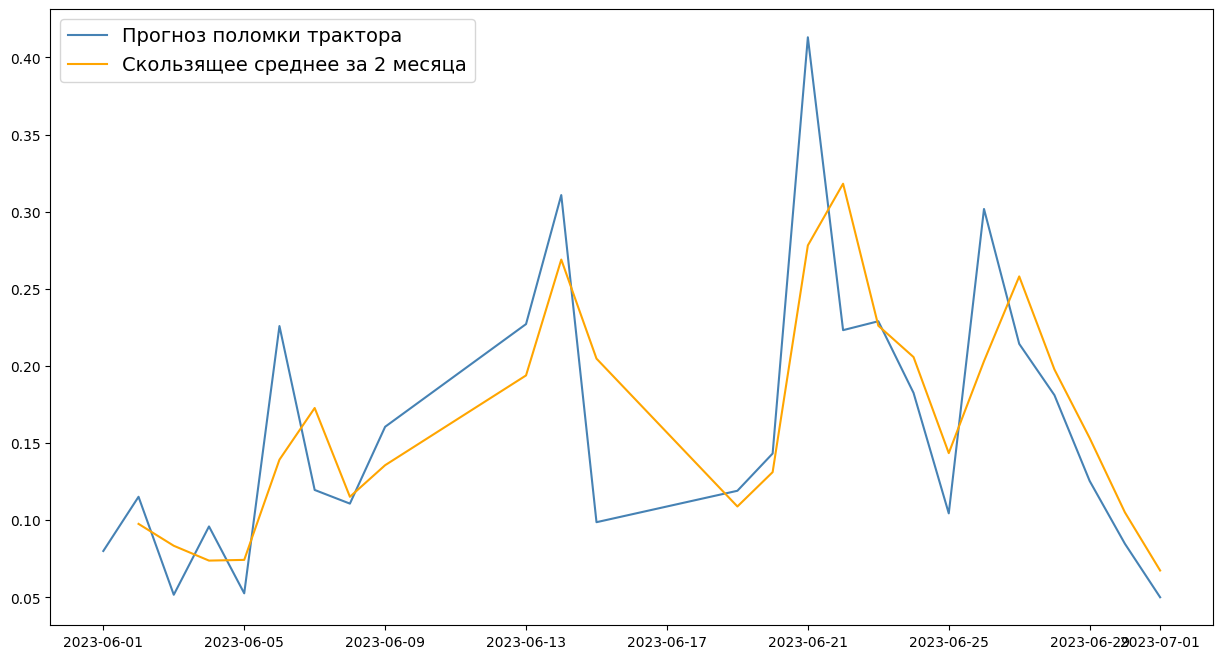

In [301]:
# зададим размер графика
plt.figure(figsize = (15,8))
 
plt.plot(df_grouped, label = 'Прогноз поломки трактора', color = 'steelblue')
plt.plot(df_grouped.rolling(window = 2).mean(), label = 'Скользящее среднее за 2 месяца', color = 'orange')
 
plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.show()


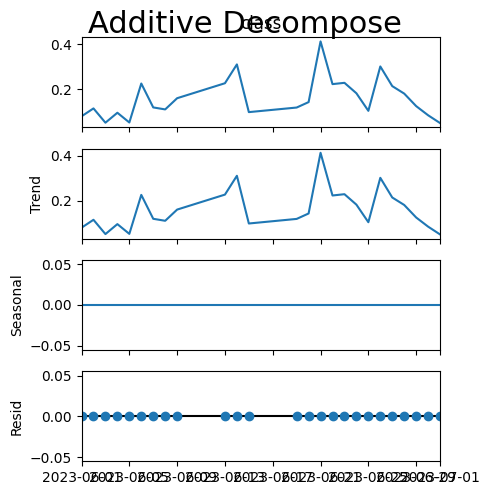

In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose
 
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
result_add = seasonal_decompose(x=df_grouped['class'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [303]:
test2 = test.reset_index()

In [304]:
date = test2['Дата и время']

In [305]:
# обучающая выборка будет включать данные до декабря 1959 года включительно
train = df_grouped[:16]
 
# тестовая выборка начнется с января 1960 года (по сути, один год)
test = df_grouped[15:]

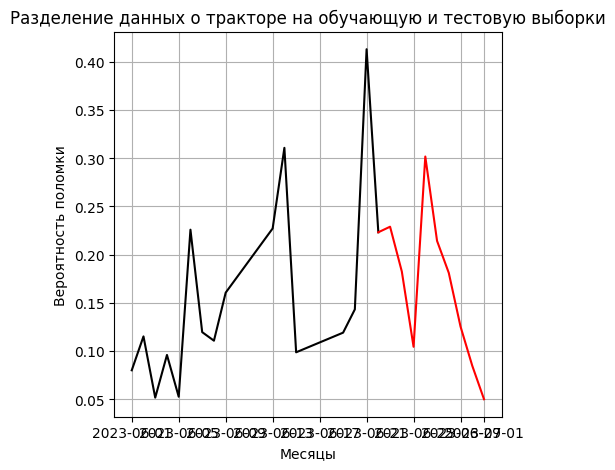

In [317]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
 
# заголовок и подписи к осям
plt.title('Разделение данных о тракторе на обучающую и тестовую выборки')
plt.ylabel('Вероятность поломки')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()

In [307]:
# тестовый прогнозный период начнется с конца обучающего периода
start = len(train)
 
# и закончится в конце тестового
end = len(train) + len(test) - 1
  
# применим метод predict
predictions = result.predict(start, end)
predictions

16    0.190255
17    0.363891
18    0.257630
19    0.248771
20    0.298588
21    0.365167
22    0.448809
23    0.236725
24    0.256976
25    0.281101
Name: predicted_mean, dtype: float64

In [308]:
predictions

16    0.190255
17    0.363891
18    0.257630
19    0.248771
20    0.298588
21    0.365167
22    0.448809
23    0.236725
24    0.256976
25    0.281101
Name: predicted_mean, dtype: float64

In [309]:
predictions = predictions.to_frame()

In [310]:
date

0    2023-06-22
1    2023-06-23
2    2023-06-24
3    2023-06-25
4    2023-06-26
5    2023-06-27
6    2023-06-28
7    2023-06-29
8    2023-06-30
9    2023-07-01
Name: Дата и время, dtype: object

In [311]:
predictions = predictions.reset_index(drop=True)
predictions

,predicted_mean
0,0.190255
1,0.363891
2,0.257630
3,0.248771
4,0.298588
5,0.365167
6,0.448809
7,0.236725
8,0.256976
9,0.281101


In [312]:
full = predictions.join(date)

In [313]:
full.set_index('Дата и время', inplace=True)

In [314]:
full

,predicted_mean
Дата и время,
2023-06-22,0.190255
2023-06-23,0.363891
2023-06-24,0.257630
2023-06-25,0.248771
2023-06-26,0.298588
2023-06-27,0.365167
2023-06-28,0.448809
2023-06-29,0.236725
2023-06-30,0.256976


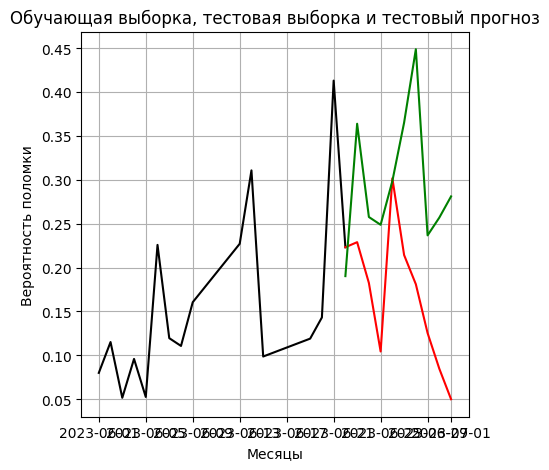

In [316]:
# выведем три кривые (обучающая, тестовая выборка и тестовый прогноз)
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(full, color = "green")
 
# заголовок и подписи к осям
plt.title("Обучающая выборка, тестовая выборка и тестовый прогноз")
plt.ylabel('Вероятность поломки')
plt.xlabel('Месяцы')
 
# добавим сетку
plt.grid()
 
plt.show()